# Data Analysis (pandas)

This series of lessons will focus on [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

This incredible workbook is authored by [Melanie Walsh](https://melaniewalsh.org/) (with minor modifications) and is available as part of her open-source book [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html).

This file is an example of a Jupyter Notebook. A Jupyter notebook is a document that can combine live programming code, text (formatted using something called Markdown), images, and pretty displays of data all in the same place. This combination makes Jupyter notebooks useful for exploring data as well as for learning and teaching.

A Jupyter notebook has a special .ipynb file extension and can only be opened if you have the application JupyterLab or Jupyter Notebook installed and running, or on a cloud server like Binder.

# pandas basics — Part 1

*Note: You can explore the [associated workbook](https://mybinder.org/v2/gh/melaniewalsh/Intro-Cultural-Analytics/master?urlpath=lab/tree/book/03-Data-Analysis/workbooks/01.5-Pandas-Basics-Part1-WORKBOOK.ipynb) for this chapter in the cloud.*

In this lesson, we're going to introduce some of the basics of [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.  A CSV file is like an Excel file, basically with column headings and rows of data.

We will cover how to:

* import pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations
* Write to a CSV file

___

## Dataset
### The Bellevue Almshouse Dataset

<blockquote class="epigraph" style=" padding: 10px">

Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

-Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
</blockquote>


The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like Pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of [their immigration] status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

___

## Import pandas

To use the Pandas library, we first need to `import` it.

In [88]:
import pandas as pd

The above `import` statement not only imports the `pandas` library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Set Display Settings

By default, `pandas` will display 60 rows and 20 columns. I often change [pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [89]:
pd.options.display.max_rows = 100

## Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [90]:
bellevue_df = pd.read_csv('bellevue_almshouse_dataset.csv', delimiter=",")

This creates a pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as **df**, e.g., **bellevue_df**. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

## Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame. When a code cell ends with a variable name, it is the same as printing the contents of that variable.

:::<code>NaN</code> is the `pandas` value for any missing data. See <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/">"Working with missing data"</a> for more information.
:::

In [91]:
bellevue_df

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,1846-05-23,Joseph,Aton,Joseph Aton,69.0,m,NaN,shoemaker,NaN,NaN,[blank],NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,NaN,NaN,[blank],NaN
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,NaN,NaN,NaN,NaN,[blank],NaN


There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (9584 x 8 columns).
    * This is very useful!

### Display First *n* Rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [92]:
bellevue_df.head()

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell


In [93]:
bellevue_df.head(10)

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
5,1847-04-14,Bridget,Hart,Bridget Hart,20.0,f,recent emigrant,spinster,Child,Shanty,george w. anderson,benson s. hopkins
6,1847-04-14,Mary,Green,Mary Green,40.0,f,recent emigrant,spinster,And child 2 months,Shanty,george w. anderson,benson s. hopkins
7,1847-04-19,Daniel,Loftus,Daniel Loftus,27.0,m,destitution,laborer,NaN,Hospital,george w. anderson,peter c. johnston
8,1847-04-10,James,Day,James Day,35.0,m,recent emigrant,laborer,NaN,NaN,NaN,NaN
9,1847-04-10,Margaret,Farrell,Margaret Farrell,30.0,f,recent emigrant,widow,NaN,NaN,NaN,NaN


### Question 1

Play around with the code! What happens if you try to invoke `head` with no parameters?

In [94]:
# your code goes here
new = bellevue_df
keys = []
for key in new.keys():
    keys += [key]

new[keys].drop(index= 4)

new = new.fillna('?!?')

new

# df[['column']] selects as a dataframe instead of a series,
# can also select multiple columns like: df[['column1','column2']]
# NOT BASED ON AN INDEX!!

# .drop() and .dropna() 
# .dropna() kills the WHOLE row if ANY NaNs are in any column of the row
# .drop() kills a specified column or index row using: columns='' (can be multiple using [])
# or using row index ex: index=3

# df_name = df_name.fillna() fills NaNs with the input

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,?!?,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,?!?,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,?!?,Child 1 mo,?!?,george w. anderson,edward witherell
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,1846-05-23,Joseph,Aton,Joseph Aton,69.0,m,?!?,shoemaker,?!?,?!?,[blank],?!?
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,?!?,?!?,?!?,Hospital Ward 38,[blank],?!?
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,?!?,?!?,[blank],?!?
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,?!?,?!?,?!?,?!?,[blank],?!?


### Display Random Sample

To look at a random sample of rows, we can use the `.sample()` method.

In [95]:
bellevue_df.sample(10)

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
6827,1847-09-21,Sarah,McMahan,Sarah McMahan,38.0,f,sickness,spinster,NaN,Hospital,william w. lyons,NaN
6821,1847-09-21,Michael,Lavly,Michael Lavly,41.0,m,sickness,mason,NaN,Hospital,william w. lyons,NaN
2150,1847-05-15,Bridget,Gibbons,Bridget Gibbons,20.0,f,recent emigrant,spinster,NaN,Hospital,superintendent,NaN
1772,1847-01-26,Mary,Murphy,Mary Murphy,24.0,f,recent emigrant,spinster,NaN,NaN,commissioners of emigration,agent
6355,1847-08-13,Catherine,Brook,Catherine Brook,34.0,f,sickness,spinster,NaN,Hospital,william w. lyons,NaN
3737,1846-07-01,Catharine,Bennett,Catharine Bennett,35.0,f,NaN,widow,NaN,NaN,george w. anderson,NaN
4040,1846-08-07,Christopher,Mallady,Christopher Mallady,30.0,m,NaN,laborer,NaN,NaN,george w. anderson,NaN
4049,1846-08-08,Delia,Scurry,Delia Scurry,52.0,f,NaN,widow,NaN,NaN,george w. anderson,NaN
4097,1846-08-14,James,Mitchell,James Mitchell,10.0,m,NaN,laborer,NaN,NaN,george w. anderson,NaN
2468,1846-01-15,Catharine,Kiernan,Catharine Kiernan,30.0,f,NaN,married,NaN,NaN,commissioners of emigration,agent


## Get Info

To get important info about all the columns in the DataFrame, we can use `.info()`.

In [96]:
bellevue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_in     9598 non-null   object 
 1   first_name  9594 non-null   object 
 2   last_name   9598 non-null   object 
 3   full_name   9598 non-null   object 
 4   age         9548 non-null   float64
 5   gender      9598 non-null   object 
 6   disease     6509 non-null   object 
 7   profession  8579 non-null   object 
 8   children    37 non-null     object 
 9   sent_to     5666 non-null   object 
 10  sender1     9521 non-null   object 
 11  sender2     5212 non-null   object 
dtypes: float64(1), object(11)
memory usage: 899.9+ KB


This report will tell us how many non-null, or non-blank, values are in each column, as well as what *type* of data is in each column.



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

## Calculate Summary Statistics

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

In [97]:
bellevue_df.describe()

,age
count,9548.000000
mean,30.337039
std,14.179527
min,0.080000
25%,21.000000
50%,28.000000
75%,39.000000
max,97.000000


To round values to any number of decimal places, we can use the `.round()` function.

In [98]:
bellevue_df.describe().round(2)

,age
count,9548.00
mean,30.34
std,14.18
min,0.08
25%,21.00
50%,28.00
75%,39.00
max,97.00


By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all`.

In [99]:
bellevue_df.describe(include='all')

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
count,9598,9594,9598,9598,9548.000000,9598,6509,8579,37,5666,9521,5212
unique,653,523,3159,7308,NaN,5,75,172,36,77,59,80
top,1847-05-24,Mary,Kelly,Mary Smith,NaN,m,sickness,laborer,Child,Hospital,george w. anderson,peter c. johnston
freq,113,979,137,21,NaN,4967,2710,3116,2,3882,3469,1666
mean,NaN,NaN,NaN,NaN,30.337039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.179527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are some insights that can be gleaned from these summary statistics:
- We cannot compute numerical statistics for columns that are not numeric. `NaN` indicates "not a number"
- For the column **first_name**, the most frequently occurring first name (**top**) is Mary, which appears 979 times (**freq**)
- For the column **last_name**, the most frequently occurring last name (**top**) is Kelly, which appears 137 times (**freq**)
- For the column **age**, average age in the dataset (**mean**) is 30, the youngest (**min**) is .08, and the oldest (**max**) is 97
- For the columns **disease** and **profession**, there are 75 unique (**unique**) diseases and 172 unique (**unique**) professions
- For the column **children**, there are 37 rows that include information about children (**count**) (i.e., rows that do not have blank values)



## Select Columns

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [100]:
bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9593                NaN
9594                NaN
9595               lame
9596                NaN
9597                NaN
Name: disease, Length: 9598, dtype: object

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [101]:
type(bellevue_df['disease'])

pandas.core.series.Series

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

In [102]:
bellevue_df[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9593,NaN
9594,NaN
9595,lame
9596,NaN


In [103]:
type(bellevue_df[['disease']])

pandas.core.frame.DataFrame

By using two square brackets, we can also select multiple columns at the same time. This allows us to make a smaller DataFrame from a big one by only selecting the columns that we need. This is useful when a dataset contains a lot of data that we don't need.

In [104]:
bellevue_df[['first_name', 'last_name', 'disease']]

,first_name,last_name,disease
0,Mary,Gallagher,recent emigrant
1,John,Sanin (?),recent emigrant
2,Anthony,Clark,recent emigrant
3,Lawrence,Feeney,recent emigrant
4,Henry,Joyce,recent emigrant
...,...,...,...
9593,Joseph,Aton,NaN
9594,Mary,Smith,NaN
9595,Francis,Riley,lame
9596,Martin,Dunn,NaN


``` {warning}
Heads up! The code below will cause an error. This will cause all the cell clock below to not run until you specify that they should.
```

See what happens if we try to select multiple columns as a Series...

In [105]:
# bellevue_df['first_name', 'last_name', 'disease']

## Count Values

To count the number of *unique* values in a column, we can use the `.value_counts()` method.

```{sidebar} On Bellevue Almshouse "Diseases"
> Some were diagnosed with medically recognizable illnesses, including “fever,” “dropsy” and “neuralgia.” Others were diagnosed with “diseases” that made visible the ways in which immigrants were failing to meet the expectations of urban citizenship. These included “destitution” and “recent emigrant.” Neither of these diagnoses reflected an immigrant’s health. Nevertheless, they were treated as pathologies, and those pathologies governed city officials perceptions of immigrants. Sickness, injuries or destitution were subsumed under the pathology of “recent emigrant.” This diagnosis also determined immigrants’ paths through the New York City public health system.

-Anelise Shrout, ["(Re)Humanizing Data: Digitally Navigating the Bellevue Almshouse"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
```

In [106]:
bellevue_df['disease'].value_counts()

disease
sickness           2710
recent emigrant    1975
destitution         846
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
injuries             32
ulcers               26
ophthalmia           19
vagrant              17
lame                 15
debility             12
rheumatism           11
blind                 9
bronchitis            9
dropsy                8
phthisis              8
old age               7
syphilis              7
dysentery             6
diarrhea              6
erysipelas            6
broken bone           5
cripple               5
drunkenness           3
burn                  3
measles               3
delusion dreams       2
scrofula              2
pneumonia             2
fits                  2
piles                 2
jaundice              2
sprain                2
abandonment           2
tuberculosis          2
scarletina            2
cut     

Look through the so-called "diseases" recorded in the Bellevue Almshouse data and consider what these categories reflect about New York City in the 1840s, particularly with regard to immigration status.

To select the top 10 most frequent values in the "disease" column, we can combine `value_counts()` with regular Python list slicing.

In [107]:
# bellevue_df['disease'].value_counts()[:10]

# .value_counts() gives an array, not a dataframe, index using only one set of index, not two. Treat like a list

pd.DataFrame(bellevue_df['disease'].value_counts()[0:10])

,count
disease,
sickness,2710
recent emigrant,1975
destitution,846
fever,192
insane,138
pregnant,134
sore,79
intemperance,71
illegible,47


In [108]:
pd.DataFrame(bellevue_df['profession'].value_counts()[:10])

,count
profession,
laborer,3116
married,1586
spinster,1522
widow,1055
shoemaker,158
tailor,116
blacksmith,104
mason,99
weaver,66


In a similar vein, consider what these "professions" reflect about New York City in the 1840s.

## Question 2

What were the top 5 first names, top 5 last names, top 10 first and last names pairings?
Write your code in the code cell below.

In [118]:
pd.DataFrame(bellevue_df['last_name'].value_counts()[:5])


,count
last_name,
Kelly,137
Smith,133
Riley,102
Murphy,91
Sullivan,81


In [117]:
# top 5 last names
pd.DataFrame(bellevue_df['first_name'][:5])

,first_name
0,Mary
1,John
2,Anthony
3,Lawrence
4,Henry


In [116]:
# top 10 first name, last name pairings

pd.DataFrame(bellevue_df[['first_name','last_name']].value_counts()[:10])

count
first_name last_name       
Mary       Smith         21
           Kelly         18
           Mullen        12
           Brown         12
           Riley         12
           Murphy        12
John       Sullivan      12
James      Kelly         11
Mary       Martin        11
Margaret   Smith         11

## Make and Save Plots

`pandas` makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Diseases"'}, xlabel='disease'>

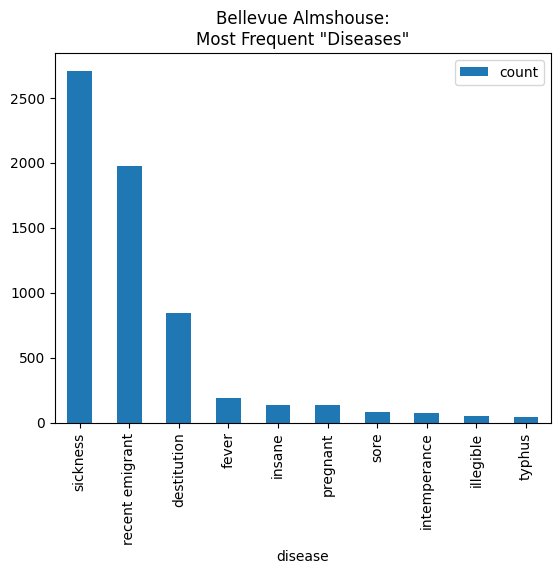

In [ ]:
# pd.DataFrame(bellevue_df['disease'].value_counts()[:10]).plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

# .plot() needs a kind='' and works on a series or a DataFRame the same way

bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots

* ‘line’ for line plots

For example, to make a horizontal bar chart, we can set `kind='barh'`Note that due to calling `.get_figure().savefig(Bellevue)`, the file `Bellevue.png` will be saved in our folder. 

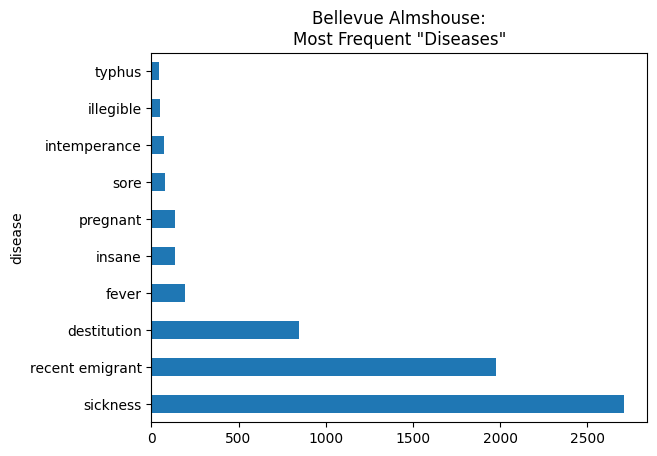

In [122]:
from matplotlib import pyplot
bellevue_df['disease'].value_counts()[:10].plot(kind='barh',title='Bellevue Almshouse:\nMost Frequent "Diseases"').get_figure().savefig('Bellevue')

To make a pie chart, we can set `kind='pie'`

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Professions"'}, ylabel='count'>

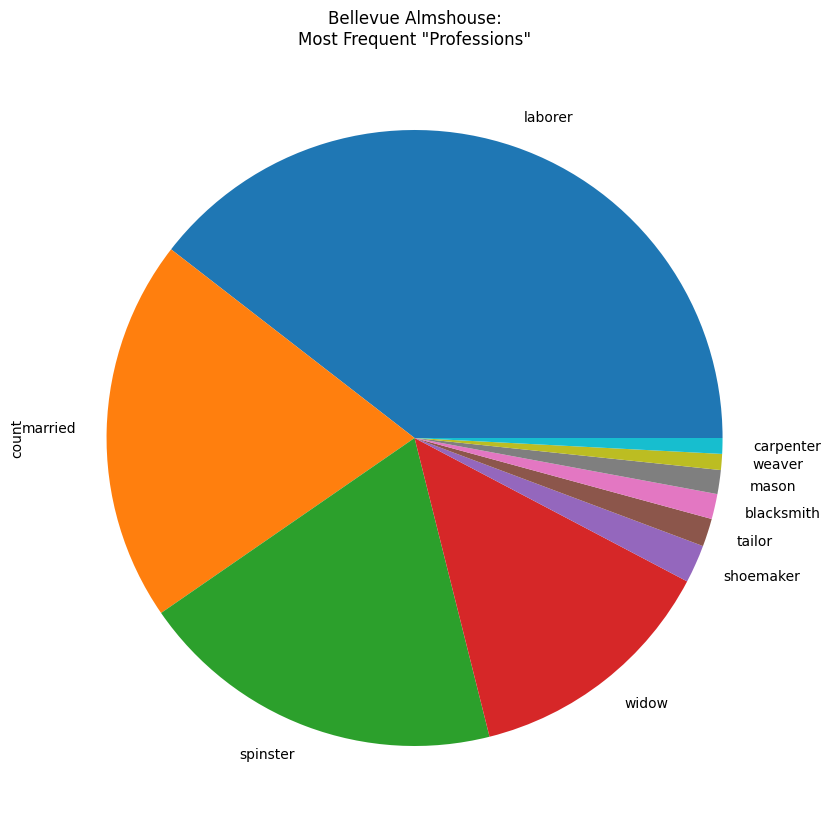

In [123]:
bellevue_df['profession'].value_counts()[:10].plot(kind='pie', figsize=(10, 10), title='Bellevue Almshouse:\nMost Frequent "Professions"')

Finally, let's make a histogram plot of the age of the people in the dataset.

<Axes: ylabel='Frequency'>

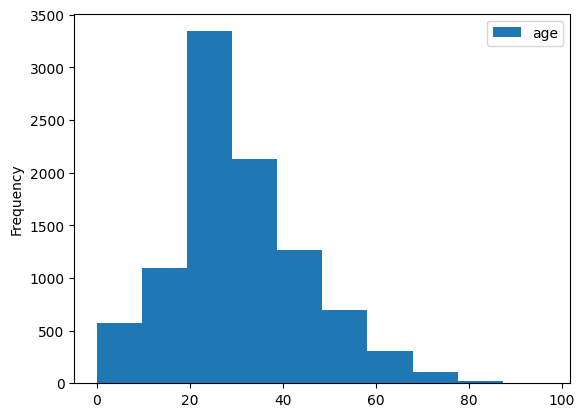

In [124]:
bellevue_df.plot.hist(y='age')

## Choosing the appropriate chart

![Graphing recommendations](graphing_recs.png)

Source: [Scientific computing 2017](https://github.com/nerdcommander/scientific_computing_2017)

To save a plot as an image file or PDF file, we can assign the plot to a variable called `ax`, short for axes.

Then we can use `ax.figure.savefig('FILE-NAME.png')` or `ax.figure.savefig('FILE-NAME.pdf')`.

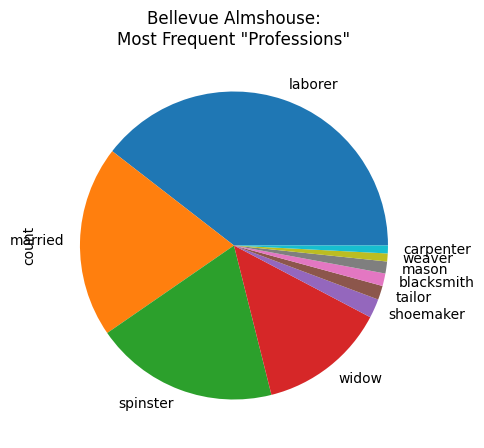

In [125]:
ax = bellevue_df['profession'].value_counts()[:10].plot(kind='pie', figsize=(5, 5), title='Bellevue Almshouse:\nMost Frequent "Professions"')
ax.figure.savefig('Bellevue-professions_pie-chart.pdf')

If your plot is being cut off in the image, see Pandas Basics Part 2 ("Prevent Labels From Getting Cut Off").

## Filter/Subset Data

We can filter a Pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. For example, to select only rows that contain the value "teacher," we insert the condition `bellevue_df['profession'] == 'teacher'`. Notice that this condition is compairing a Series (or column) to a string. This is part of the magic of `pandas`: it will take care of iterating through the Series and selecting only the rows where the condition is True.

In [ ]:
bellevue_df[bellevue_df['profession'] == 'teacher']


# or smtg like this:
# bellevue_df[bellevue_df['age'] % 3 == 0]
# the operator needs to be boolean when filtering, but remember since the inside is a series, we can add to all,
# multiply, etc.

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
7,1847-04-19,Daniel,Loftus,Daniel Loftus,27.0,m,destitution,laborer,NaN,Hospital,george w. anderson,peter c. johnston
9,1847-04-10,Margaret,Farrell,Margaret Farrell,30.0,f,recent emigrant,widow,NaN,NaN,NaN,NaN
10,1847-04-10,Bridget,Day,Bridget Day,30.0,f,recent emigrant,married,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9582,1847-04-02,Ann,Gedney,Ann Gedney,30.0,f,sickness,widow,NaN,Hospital,NaN,NaN
9583,1847-09-01,John,Masterson,John Masterson,60.0,m,sickness,laborer,NaN,Blackwell's Island,john p. cumming,NaN
9584,1847-10-23,Edward,Riley,Edward Riley,45.0,m,destitution,cabinet maker,NaN,Blackwell's Island,moses m. s. jackson,NaN
9591,1847-08-18,James,Lynch,James Lynch,33.0,m,sore,laborer,NaN,Hospital,william w. lyons,NaN


It can be helpful to isolate this condition and see that it produces a long list of True/False pairs for every row.

In [ ]:
bellevue_df['profession'] == 'teacher'

0       False
1       False
2       False
3       False
4       False
        ...  
9593    False
9594    False
9595    False
9596    False
9597    False
Name: profession, Length: 9598, dtype: bool

Filtering DataFrames can sometimes get confusing and unwieldy (as conditions within conditions pile up like Russian Matryoshka Dolls). It can be helpful to make a separate variable for a filter, as below.

In [128]:
teacher_filter = bellevue_df['profession'] == 'teacher'

In [129]:
bellevue_df[teacher_filter]

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
2196,1847-03-12,Michael,Rush,Michael Rush,40.0,m,recent emigrant,teacher,NaN,Bellevue Garret,george w. anderson,peter c. johnston
2693,1846-03-11,Thomas,Brady,Thomas Brady,45.0,m,NaN,teacher,NaN,NaN,commissioners of emigration,agent
3774,1846-07-06,Henry,Dunlap,Henry Dunlap,66.0,m,NaN,teacher,NaN,NaN,george w. anderson,NaN
4284,1846-09-03,John B.,Murray,John B. Murray,45.0,m,NaN,teacher,NaN,NaN,george w. anderson,NaN
4287,1846-09-03,Alexander,Alcock,Alexander Alcock,46.0,m,NaN,teacher,NaN,NaN,george w. anderson,NaN
4612,1846-10-15,John,Dillon,John Dillon,32.0,m,NaN,teacher,NaN,NaN,george w. anderson,NaN
5225,1847-03-01,George F.,Robins,George F. Robins,57.0,m,destitution,teacher,NaN,Bellevue Garret,george w. anderson,edward witherell
6254,1847-08-05,Patrick,McGowen,Patrick McGowen,24.0,m,sickness,teacher,NaN,Hospital,william w. lyons,NaN
8305,1847-05-27,William,Smith,William Smith,29.0,m,destitution,teacher,NaN,Blackwell's Island,moses g. leonard,edward witherell
8653,1847-06-23,Thomas,Gleason,Thomas Gleason,50.0,m,sickness,teacher,NaN,Hospital,moses g. leonard,oscar s. field


In a similar vein, it's often useful to make a new variable for a filtered DataFrame. For example, let's say we wanted to look at only the women in the dataset and see the most commons professions.

In [130]:
women_filter = bellevue_df['gender'] == 'f'

In [131]:
# store the results of DataFrame obtained by women_filter in bellevue_women
bellevue_women = bellevue_df[women_filter]

In [132]:
# determine the professions of women only
bellevue_women['profession'].value_counts()

profession
married        1566
spinster       1508
widow          1045
laborer          27
seamstress        3
baker             2
waiter            2
single            2
(illegible)       1
carpenter         1
gardener          1
weaver            1
peddler           1
cook              1
sham              1
tailor            1
servant           1
Name: count, dtype: int64

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Professions"'}, ylabel='count'>

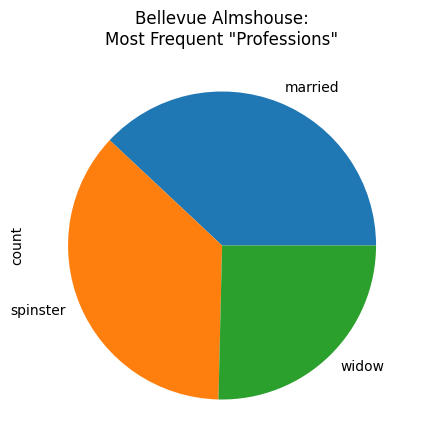

In [133]:
# Plot the top 3 professions of women as a pie chart

bellevue_women['profession'].value_counts()[:3].plot(kind='pie', figsize=(5, 5), title='Bellevue Almshouse:\nMost Frequent "Professions"')

There's a lot we can do with filters beyond exact value matches with an equals operator `==`.

We can also incorporate `>`, `<`, `>=`, `<=` with integers, floats, and even dates. For example, we can filter the DataFrame for only people who arrived to the Bellevue Almshouse on or after '1847-04-17'

In [134]:
date_filter = bellevue_df['date_in'] >= '1847-04-17'

In [135]:
bellevue_df[date_filter]

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
7,1847-04-19,Daniel,Loftus,Daniel Loftus,27.0,m,destitution,laborer,NaN,Hospital,george w. anderson,peter c. johnston
15,1847-04-17,Dan,Delany,Dan Delany,10.0,m,typhus,NaN,NaN,Hospital,george w. anderson,NaN
22,1847-04-17,Catharine,Lyon,Catharine Lyon,20.0,f,recent emigrant,spinster,NaN,Hospital,superintendent,george h. purser
...,...,...,...,...,...,...,...,...,...,...,...,...
9592,1847-04-30,Jas,Bowden,Jas Bowden,40.0,m,sickness,mason,NaN,Hospital,william a. walker,NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,NaN,NaN,[blank],NaN
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,NaN,NaN,NaN,NaN,[blank],NaN


## Write to CSV

To output a new CSV file, we can use the `.to_csv` method with a name for the file in quotation marks. 

Here's how we might output a new CSV file that only includes rows with women.  This will create the `Bellevue_women.csv` file in our folder. 

In [ ]:
bellevue_women.to_csv("Bellevue_women.csv", encoding='utf-8', index=False)

In addition to a filename, we're also specifying that the encoding is utf-8 and that the Index (the bolded left-most column) is not included in the CSV file.

In [136]:
bellevue_women

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
5,1847-04-14,Bridget,Hart,Bridget Hart,20.0,f,recent emigrant,spinster,Child,Shanty,george w. anderson,benson s. hopkins
6,1847-04-14,Mary,Green,Mary Green,40.0,f,recent emigrant,spinster,And child 2 months,Shanty,george w. anderson,benson s. hopkins
9,1847-04-10,Margaret,Farrell,Margaret Farrell,30.0,f,recent emigrant,widow,NaN,NaN,NaN,NaN
10,1847-04-10,Bridget,Day,Bridget Day,30.0,f,recent emigrant,married,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9587,1847-05-11,Mary,Gannon,Mary Gannon,25.0,f,sickness,spinster,NaN,Hospital,william a. walker,NaN
9588,1846-08-14,Ann,Murray,Ann Murray,25.0,f,NaN,NaN,NaN,NaN,widow,NaN
9589,1847-04-28,Bridget,Ryan,Bridget Ryan,28.0,f,destitution,spinster,NaN,Hospital,william a. walker,NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN


## Further Resources

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), Pandas Official Documentation
- ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas